In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
from cmdstanpy import CmdStanModel
import arviz as az

az.style.use("arviz-darkgrid")
np.random.seed(0)

script_dir = os.path.dirname('autoML.ipynb')

In [4]:
N = 40  # アリスのデザインA案の表示数
a = 2   # アリスのデザインA案のクリック数

file_path = os.path.join(script_dir, 'model.stan')
model = CmdStanModel(stan_file=file_path)

data = {'N': N, 'a': a}

fit = model.sample(
  data=data,
  chains=2,
  seed=0,
  iter_warmup=1000,
  iter_sampling=5000,
  show_progress=True
)

cmdstanpy_data = az.from_cmdstanpy(
    posterior=fit,
    log_likelihood="lp__",
)

print(fit.diagnose())

18:59:54 - cmdstanpy - INFO - compiling stan file /Users/tueno/Documents/master/master-thesis/coding-exercises/autoML/model.stan to exe file /Users/tueno/Documents/master/master-thesis/coding-exercises/autoML/model
18:59:57 - cmdstanpy - INFO - compiled model executable: /Users/tueno/Documents/master/master-thesis/coding-exercises/autoML/model
18:59:57 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

18:59:57 - cmdstanpy - INFO - CmdStan done processing.



Processing csv files: /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp55zq8kw0/modelcr2daf6y/model-20230418185957_1.csv, /var/folders/nr/8kygzlbx7djc1yh15qnzhhgr0000gn/T/tmp55zq8kw0/modelcr2daf6y/model-20230418185957_2.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [5]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-11.348300,0.012931,0.766539,-12.924500,-11.045700,-10.809500,3513.82,41339.1,1.00013
theta,0.070999,0.000644,0.039608,0.019248,0.063778,0.145619,3786.57,44547.9,1.00080


/Users/tueno/.pyenv/versions/3.11.0/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


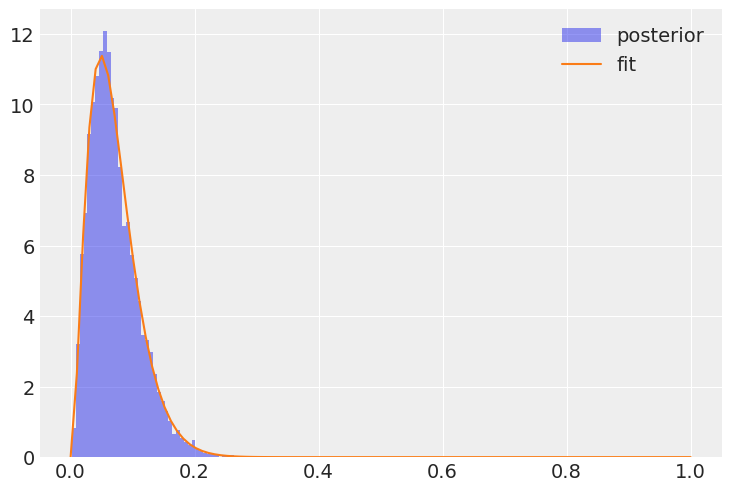

In [16]:
# what is the posterior distribution of theta?
# module import
import scipy.optimize
import scipy.stats as stats

theta_samples = fit.stan_variable('theta')
# Fit a beta distribution to the posterior samples
a, b, loc, scale = stats.beta.fit(theta_samples)

# Plot the histogram of the posterior samples and the fitted beta distribution
x = np.linspace(0, 1, 100)
plt.hist(theta_samples, bins=50, density=True, alpha=0.5, label='posterior')
plt.plot(x, stats.beta.pdf(x, a, b, loc, scale), label='fit')
plt.legend()
plt.show()

In [17]:
print(a,b,loc,scale)

2.915229548672695 42.64390073064389 0.00031199489327531484 1.1046979470438039
